# Linear Regression

## The Normal Equation

*Aby określić wartość wektora θ minimalizującą MSE, można użyć jawnego rozwiązania (ang. closed-form solution) — innymi słowy, wzoru matematycznego dającego bezpośredni wynik. Jest to tak zwane równanie normalne*

$\hat{\theta}=(X^TX)^{-1}X^Ty$

In [1]:
import numpy as np

np.random.seed(42)
m = 100    # number of instances
X = 2 * np.random.rand(m, 1)    # column vector
y = 4 + 3 * X + np.random.randn(m, 1)   # column vector

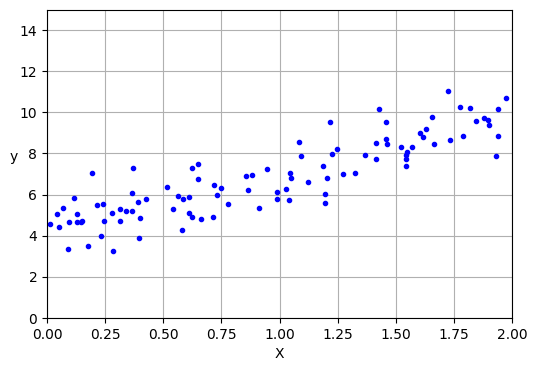

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y", rotation=0)
#plt.scatter(X, y, s=10)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

$\hat{\theta}=(X^TX)^{-1}X^Ty$

*Dane wygenerowaliśmy za pomocą funkcji y = 4 + 3x + szum gaussowski. Sprawdźmy, co ten wzór wyliczył:*

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)    # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [35]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [36]:
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

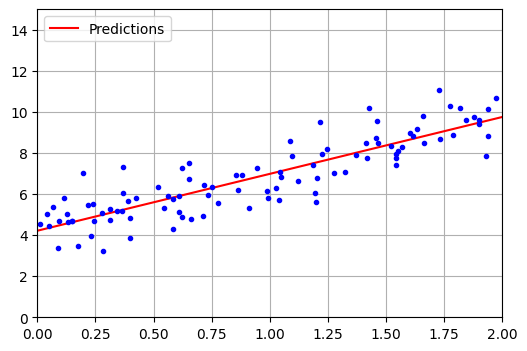

In [5]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

*Klasa LinearRegression bazuje na funkcji `scipy.linalg.lstsq()` (skrót lstsq wywodzi się od angielskiej nazwy least squares, czyli „najmniejsze kwadraty”), którą możemy wywołać bezpośrednio:*

In [7]:
# SVD - Singular Value Decomposition
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

## Gradient Descent

*Podczas korzystania z metody gradientu prostego należy umieścić wszystkie cechy
w zbliżonej skali (np. za pomocą klasy `StandardScaler` modułu Scikit-Learn), gdyż w przeciwnym wypadku algorytm będzie potrzebował znacznie więcej czasu na osiągnięcie zbieżności.*

#### Batch Gradient Descent

*Aby zaimplementować metodę gradientu prostego, musimy obliczyć gradient funkcji kosztu wobec każdego parametru $θ_j$ modelu. Innymi słowy, musimy policzyć, jak bardzo funkcja kosztu ulegnie
zmianie, jeżeli tylko troszeczkę zmodyfikujemy $θ_j$. Proces ten nosi nazwę wyliczania **pochodnej cząstkowej**.*

*Na każdym etapie gradientu prostego przeprowadza się takie obliczenia wobec całego zbioru uczącego X. Dlatego algorytm ten jest nazywany **wsadowym
gradientem prostym (ang. batch gradient descent)**: wykorzystuje on pełny zbiór
danych uczących w każdym przebiegu (prawdopodobnie lepszą nazwą byłaby pełny
gradient prosty). Wynika z tego, że jest on bardzo powolny w przypadku dużych zestawów danych. Jednak algorytm ten znakomicie dostosowuje się do liczby cech; uczenie modelu regresji liniowej za pomocą algorytmu gradientu prostego przebiega znacznie szybciej niż przy użyciu równania normalnego lub rozkładu SVD.*

*Po wyliczeniu wektora gradientów (będzie on wskazywał jakiś punkt na wzniesieniu funkcji) wystarczy się skierować w przeciwną stronę, aby zacząć schodzić w dół funkcji. Właśnie tutaj przydaje się współczynnik uczenia: przemnażamy go (η) przez wektor gradientów, aby określić długość kroku.*

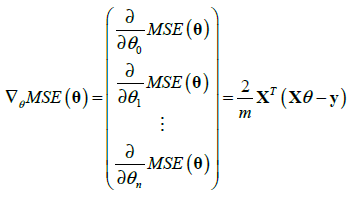

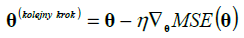

In [8]:
X_b[:3]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788]])

In [9]:
eta = 0.1  # learning rate
n_epochs = 800
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients
  if (epoch % 100 == 0):
    print(f"Theta: {theta}")

Theta: [[1.78737583]
 [1.27927812]]
Theta: [[4.19533328]
 [2.78756293]]
Theta: [[4.21447076]
 [2.77066557]]
Theta: [[4.21507637]
 [2.77013086]]
Theta: [[4.21509553]
 [2.77011394]]
Theta: [[4.21509614]
 [2.7701134 ]]
Theta: [[4.21509616]
 [2.77011339]]
Theta: [[4.21509616]
 [2.77011339]]


### Stochastic Gradient Descent

*Główny problem algorytmu wsadowego gradientu prostego polega na tym, że wykorzystuje on pełny zbiór danych uczących do obliczania gradientu podczas każdego przebiegu, przez co wraz ze wzrostem rozmiaru zbioru uczącego spada jego szybkość. Jego przeciwieństwo stanowi **algorytm stochastycznego
spadku wzdłuż gradientu (ang. stochastic gradient descent — SGD)**, w którym podczas każdego przebiegu jest dobierana losowa próbka ucząca, za pomocą której są wyliczane gradienty.
Oczywiście przetwarzanie pojedynczych przykładów sprawia, że algorytm ten jest znacznie szybszy, gdyż w każdym przebiegu wykorzystuje niewiele danych. Dzięki temu możemy go również używać wobec dużych zestawów danych, ponieważ podczas każdego przebiegu jest przechowywany w pamięci tylko jeden przykład.
Z drugiej strony w wyniku stochastycznej (tj. losowej) natury algorytm ten jest znacznie bardziej „chaotyczny” od jego wsadowego odpowiednika: funkcja kosztu nie schodzi tu łagodnie w kierunku minimum, lecz przeskakuje raz wyżej, raz niżej i dąży do minimum jedynie po uśrednieniu wyników.
Po pewnym czasie w końcu trafi w okolicę bliską minimum, ale nie zatrzyma się i ciągle będzie „skakać”. Po zatrzymaniu algorytmu uzyskane wartości będą dobre, ale nie idealnie optymalne.*

*Losowość przydaje się więc do ucieczki z minimów lokalnych, ale jednocześnie nie pozwala osiągnąć najniższego punktu funkcji kosztu. Jednym z rozwiązań tego problemu jest stopniowe zmniejszanie współczynnika uczenia. Początkowe kroki są duże (przyspieszamy w ten sposób działanie algorytmu i wydostajemy się z minimów lokalnych), a następnie stają się coraz krótsze, dzięki czemu algorytm
pozostaje w okolicach minimum globalnego. Proces ten jest podobny do **symulowanego wyżarzania (ang. simulated annealing)**, algorytmu przypominającego proces wyżarzania w metalurgii, który polega na tym, że roztopiony metal jest stopniowo chłodzony. Funkcja określająca współczynnik uczenia w każdym przebiegu jest nazywana **harmonogramem uczenia (ang. learning schedule)**. Jeżeli zbyt szybko zredukujemy ten współczynnik, możemy utknąć w minimum lokalnym, a nawet pozostać gdzieś w połowie stoku. Z kolei jeżeli harmonogram uczenia będzie malał zbyt powoli, możemy przez długi
czas pomijać minimum globalne i uzyskać nieoptymalne rozwiązanie, jeśli zbyt wcześnie zakończymy
działanie algorytmu.*

In [10]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
m = len(X_b)      # number of instances

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
      random_index = np.random.randint(m)
      xi = X_b[random_index : random_index + 1]
      yi = y[random_index : random_index + 1]
      gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
      eta = learning_schedule(epoch * m + iteration)
      theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

*SGDRegressor działa iteracyjnie — w każdej epoce stara się zminimalizować funkcję straty.*

*Po każdej epoce sprawdza, czy funkcja straty nadal wyraźnie maleje.*

*Jeśli poprawa jest mniejsza niż tol, uznaje, że algorytm się ustabilizował i kończy uczenie przed osiągnięciem max_iter.*

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=0.00001, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

# tol - Jeśli poprawa funkcji straty pomiędzy epokami spadnie poniżej 0.00001,
# uczenie zostanie przerwane wcześniej, mimo że max_iter=1000

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### Mini-batch gradient descent

*Ostatnim rodzajem algorytmu gradientu prostego, jakim się zajmiemy, jest metoda **schodzenia po gradiencie z minigrupami (ang. mini-batch gradient descent)**. Łatwo go zrozumieć, gdy znamy już
pojęcia wsadowego gradientu prostego i stochastycznego spadku wzdłuż gradientu: tutaj w każdym
przebiegu nie obliczamy gradientu na podstawie całego zbioru danych (metoda wsadowa) ani pojedynczych
próbek (stochastyczny spadek), lecz przy użyciu niewielkich grup losowo dobieranych danych,
tzw. **minigrup lub minipaczek (ang. mini-batches)**. W porównaniu do stochastycznego
spadku wzdłuż gradientu główną zaletą tej metody jest znaczne przyspieszenie sprzętowej optymalizacji
operacji na macierzach, zwłaszcza jeśli korzystamy z procesorów graficznych.*

### Polynomial Regression

*Co w przypadku, jeśli Twoje dane nie układają się liniowo na wykresie? Co ciekawe, jesteśmy w stanie
wytrenować model liniowy do rozpoznawania nieliniowych danych. Najprostszym sposobem jest
dodanie potęg każdej cechy w postaci nowej cechy, a następnie wytrenowanie modelu wobec tak rozszerzonego
zestawu cech. Technikę tę nazywamy **regresją wielomianową (ang. polynomial regression)**.*

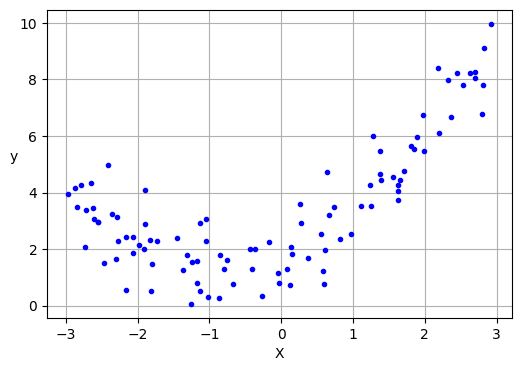

In [13]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(6,4))
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.grid()
plt.show()

*Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form* [a, b]*, the degree-2 polynomial features are* [1, a, b, a^2, ab, b^2].

*PolynomialFeatures służy do tworzenia nowych cech, które są wielomianowymi kombinacjami istniejących cech. Przydaje się szczególnie wtedy, gdy relacja między cechami a zmienną docelową nie jest liniowa. Dzięki temu możesz uczyć nieliniowych modeli przy użyciu liniowych algorytmów (np. `LinearRegression` lub `SGDRegressor`).*

*-*

**Kiedy warto go użyć?**
* Masz dane z widoczną nieliniową zależnością
* Chcesz uchwycić złożone zależności między cechami
* Chcesz używać prostych, szybkich modeli liniowych, ale z możliwością nieliniowego dopasowania

**Nie używaj, gdy:**
1.   Masz bardzo duże cech
  * Stopień `d` wielomianu i liczba cech `n` powoduje eksplozję liczby kombinacji
  * To może prowadzić do przeuczenia (overfittingu) i bardzo dużego zapotrzebowania na RAM.
2.   Model już dobrze radzi sobie z nieliniowościami  
  * Modele takie jak **drzewa decyzyjne, random forest, XGBoost, SVM z kernelami, sieci neuronowe** potrafią uczyć się nieliniowości bez potrzeby dodawania wielomianowych cech.
3.   Nie masz normalizacji danych
  * Wielomiany (szczególnie wysokiego stopnia) są **wrażliwe na skalowanie**. Przed ich użyciem dane powinny być przeskalowane, np. za pomocą `StandardScaler`.    

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[:5], X_poly[:5]

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]),
 array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433]]))

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Model szacuje wzór: $\hat{y}=0.56x^2+0.93x+1.78$ podczas gdy oryginalna funkcja ma postać: $\hat{y}=0.5x^2+1.0x+2.0+szumgaussowski$

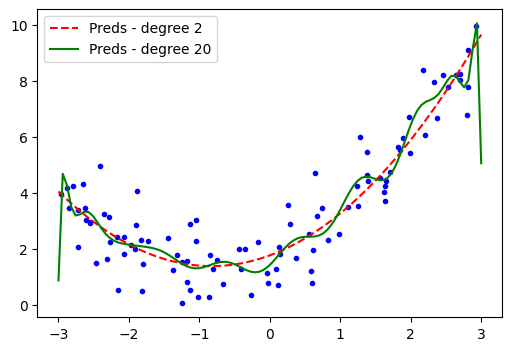

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_new = np.linspace(-3, 3, m).reshape(m, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_pred = lin_reg.predict(X_new_poly)


poly_bigger_features = PolynomialFeatures(degree=20, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
polynomial_regression = make_pipeline(poly_bigger_features, std_scaler, lin_reg)
polynomial_regression.fit(X, y)
y_big_predict = polynomial_regression.predict(X_new)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r--", label="Preds - degree 2")
plt.plot(X_new, y_big_predict, "g-", label="Preds - degree 20")
plt.legend(loc="upper left")
plt.show()

*Do oszacowania wydajności uogólniania modelu można wykorzystać metodę **sprawdzianu krzyżowego**. Jeżeli model sprawuje się dobrze wobec danych uczących, ale według wskaźników kroswalidacji nie radzi sobie z generalizowaniem, to znaczy, że ulega przetrenowaniu. W przypadku gdy model
nie radzi sobie zarówno ze zbiorem uczącym, jak i z uogólnianiem, jest niedotrenowany. Jest to jeden ze sposobów na stwierdzenie, czy model jest za prosty, czy zbyt złożony.*

*Inną metodą określenia stopnia złożoności modelu jest **analiza krzywych uczenia (ang. learning curves)**, czyli krzywych błędów dla zbioru uczącego i walidacyjnego w funkcji iteracji trenowania:
wystarczy oceniać model w regularnych odstępach podczas uczenia trenowania zarówno na zbiorze uczącym, jak i walidacyjnym, po czym narysować wykres rezultatów. Jeżeli nie można trenować modelu przyrostowo (tj. nie obsługuje metody `partial_fit()` ani parametru `warm_start`), to musisz wyuczyć go kilka razy na coraz większych podzbiorach zbioru uczącego.*


*Biblioteka Scikit-Learn zawiera przydatną funkcję `learning_curve()` ułatwiającą to zadanie: trenuje ona i ocenia model za pomocą sprawdzianu krzyżowego. Domyślnie trenuje ona wielokrotnie model na coraz większych podzbiorach zestawu uczącego, jeśli jednak model obsługuje trenowanie przyrostowe, możesz w trakcie wywoływania funkcji `learning_curve` wyznaczyć `exploit_incremental_learning=True`, dzięki czemu zostanie wykorzystana ta strategia. Funkcja ta zwraca rozmiary podzbiorów uczących, za pomocą których był trenowany model, a także oceny uczenia i walidacji zmierzone
dla każdego podzbioru i minigrupy sprawdzianu krzyżowego.*

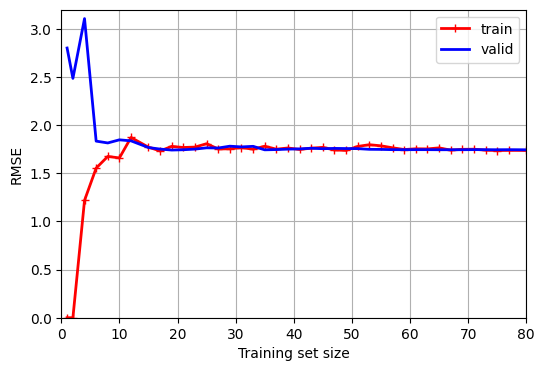

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5, scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_errors, "b-", linewidth=2, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 3.2])
plt.show()

*Te krzywe uczenia są charakterystyczne dla niedotrenowanego modelu. Obydwie siągnęły wypłaszczenie; znajdują się blisko siebie i mają dość duże wartości.*

*Jeżeli Twój model jest niedotrenowany, dodawanie kolejnych próbek uczących niewiele pomoże. Musisz skorzystać z lepszego modelu lub wprowadzić lepsze cechy.*

---

Sprawdźmy teraz krzywe uczenia dziesięciostopniowego modelu wielomianowego wobec tych samych danych

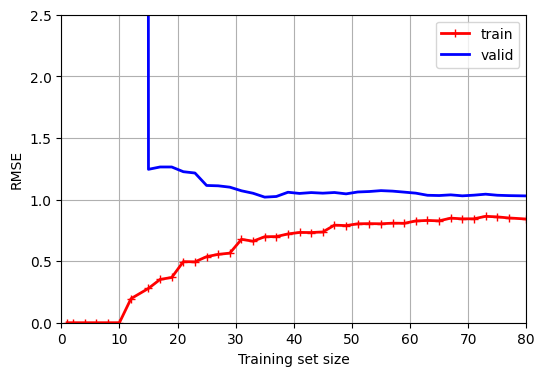

In [18]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, test_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5, scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, test_errors, "b-", linewidth=2, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

*Wykresy te przypominają nieco krzywe uczenia modelu liniowego, możemy jednak dostrzec dwie
bardzo istotne różnice:*
* *Błąd dla zbioru uczącego osiąga znacznie niższy poziom niż wcześniej.*
* *Istnieje przerwa pomiędzy obydwiema krzywymi. Oznacza to, że model radzi sobie znacznie lepiej z danymi uczącymi niż ze zbiorem walidacyjnym, co stanowi wyznacznik przetrenowania modelu. Gdybyśmy jednak korzystali ze znacznie większych zestawów danych, odległość pomiędzy krzywymi zmniejszałaby się stopniowo.*

Jednym ze sposobów na poprawienie przetrenowanego modelu jest wprowadzenie
dodatkowych przykładów aż do zrównania się błędu danych uczących z błędem danych
walidacyjnych.

**Kompromis pomiędzy obciążeniem a wariancją**

Ważną konsekwencją rozważań łączących statystykę z uczeniem maszynowym jest fakt, że błąd generalizacji modelu można wyrazić w postaci sumy trzech odmiennych rodzajów błędów:
* **Obciążenie (ang. bias)**: ta składowa błędu uogólnienia wynika z nieprawidłowych założeń, np. założenia, że dane są liniowe, podczas gdy w rzeczywistości są opisane funkcją kwadratową. *Model o wysokiej wartości obciążenia ma największą szansę na niedotrenowanie wobec danych uczących*.
* **Wariancja (ang. variance)**: ta składowa wynika z nadmiernej czułości modelu na drobne wahania w wartościach danych uczących. *Model cechujący się dużą liczbą stopni swobody (np. wielostopniowy model wielomianowy) prawdopodobnie będzie miał dużą wariancję, a przez to będzie przetrenowywany
wobec danych uczących.*
* **Błąd nieredukowalny (ang. irreducible error)**: ta składowa stanowi konsekwencję zaszumienia danych. Jedynym sposobem pozbycia się jej jest oczyszczenie danych (np. naprawa źródeł danych, takich jak
zepsute czujniki, lub wykrywanie i usuwanie elementów odstających).

*Zwiększanie złożoności modelu zazwyczaj zwiększa jego wariancję i zmniejsza obciążenie. Odwrotny proces następuje w przypadku uproszczenia modelu. Dlatego mówimy tu u kompromisie.*

# Regularized Linear Models

## Ridge Regression

In [19]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

X_new = np.linspace(0, 3, 100).reshape(100, 1)

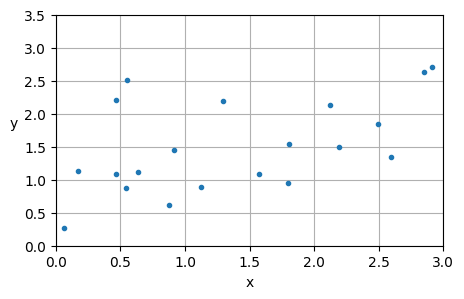

In [20]:
plt.figure(figsize=(5, 3))
plt.plot(X, y, ".")
plt.xlabel("x")
plt.ylabel("y  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [21]:
from sklearn.linear_model import Ridge

# solver{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55325833])

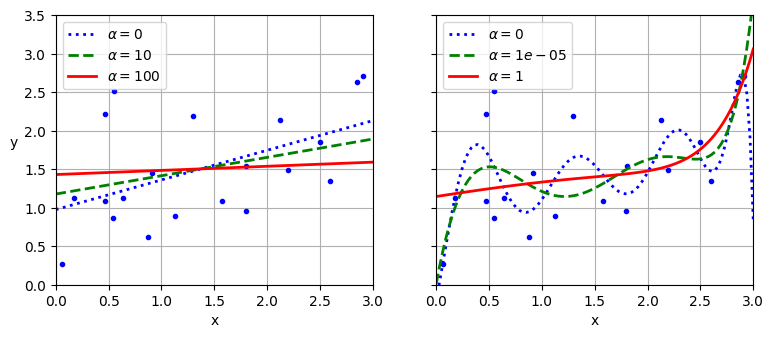

In [22]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
  plt.plot(X, y, "b.", linewidth=3)

  for alpha, style in zip(alphas, ("b:", "g--", "r-")):
    if alpha > 0:
      model = model_class(alpha, **model_kwargs)
    else:
      model = LinearRegression()

    if polynomial:
      model = make_pipeline(
          PolynomialFeatures(degree=10, include_bias=False),
          StandardScaler(),
          model)

    model.fit(X, y)
    y_new_regul = model.predict(X_new)
    plt.plot(X_new, y_new_regul, style, linewidth=2,
             label=fr"$\alpha = {alpha}$")

  plt.legend(loc="upper left")
  plt.xlabel("x")
  plt.axis([0, 3, 0, 3.5])
  plt.grid()


plt.figure(figsize=(9, 3.5))
plt.subplot(121) # 1 row, 2 columns, first plot (from the left)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("y  ", rotation=0)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

### RidgeCV

Linear Regression MSE: 1.0470
RidgeCV Regression MSE: 0.8154
Selected alpha (Ridge): 0.3727593720314938


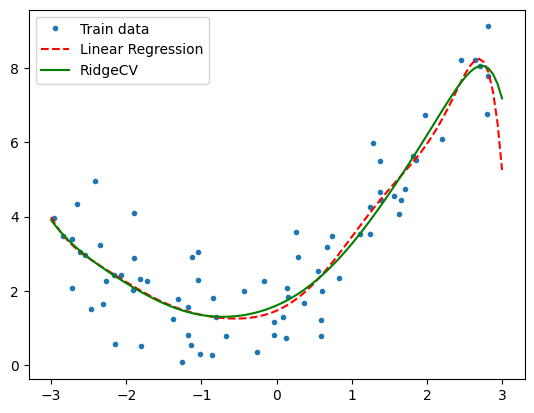

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model_lin = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

alphas = np.logspace(-3, 3, 50)
model_ridge = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=10, include_bias=False),
    RidgeCV(alphas, scoring='neg_mean_squared_error', cv=5)
)

model_lin.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)

y_pred_lin = model_lin.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Linear Regression MSE: {mse_lin:.4f}")
print(f"RidgeCV Regression MSE: {mse_ridge:.4f}")
print(f"Selected alpha (Ridge): {model_ridge.named_steps['ridgecv'].alpha_}")


X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot_lin = model_lin.predict(X_plot)
y_plot_ridge = model_ridge.predict(X_plot)

plt.plot(X_train, y_train, ".", label='Train data')
plt.plot(X_plot, y_plot_lin, "r--", label='Linear Regression')
plt.plot(X_plot, y_plot_ridge, "g-", label='RidgeCV')
plt.legend()
plt.show()

*Klasa `RidgeCV` przeprowadza regresję grzbietową, ale automatycznie stroi
hiperparametry za pomocą sprawdzianu krzyżowego. Jest ona w przybliżeniu równoważna zastosowaniu klasy `GridSearchCV`, została jednak zoptymalizowana z myślą o regresji grzbietowej i działa znacznie szybciej. Kilka innych estymatorów (głównie liniowych) również zawiera wydajne warianty ze sprawdzianem krzyżowym, na przykład `LassoCV` i `ElasticNetCV`.*

## Lasso Regression

In [24]:
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [25]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.73090508])

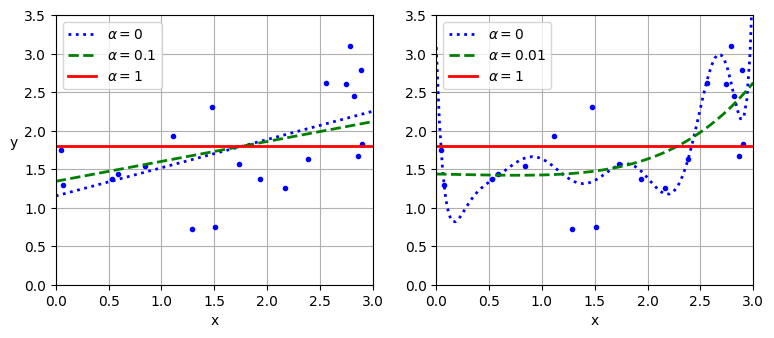

In [26]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("y  ", rotation=0)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)

plt.show()

In [27]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LassoCV

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

model_lasso = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=10, include_bias=False),
    LassoCV(alphas=np.logspace(0, 1.5, 50), cv=5, random_state=42)
)

model_lasso.fit(X, y.ravel())
best_alpha = model_lasso.named_steps['lassocv'].alpha_
best_alpha

np.float64(1.0)

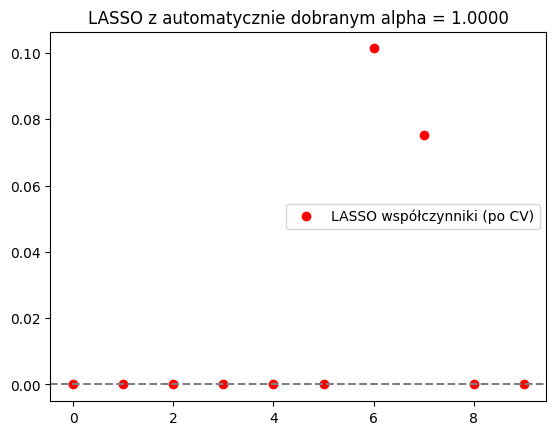

In [28]:
# Współczynniki po LASSO
plt.plot(model_lasso.named_steps['lassocv'].coef_, 'o', label='LASSO współczynniki (po CV)', color='red')
plt.axhline(0, color='grey', linestyle='--')
plt.legend(loc="center right")
plt.title(f'LASSO z automatycznie dobranym alpha = {best_alpha:.4f}')
plt.show()

## Elastic Net

***Metoda elastycznej siatki (ang. elastic net)** stanowi rozwiązanie pośrednie pomiędzy regresją grzbietową
a metodą LASSO. Człon regularyzacyjny w tym przypadku tworzy suma ważona obydwu omówionych
członów regularyzacji, my zaś możemy nim sterować za pomocą współczynnika proporcji r.*

*Gdy r = 0, metoda elastycznej siatki staje się równoważna regresji grzbietowej, natomiast przy r = 1 zachowuje się jak metoda LASSO*

***Kiedy więc należy stosować regresję grzbietową, LASSO, elastyczną siatkę, a kiedy zwykłą regresję liniową (tj. nieregularyzowaną)?***

*Niemal zawsze warto wprowadzić chociaż odrobinę regularyzacji,
dlatego staraj się unikać zwykłej regresji liniowej. Dobrym domyślnym rozwiązaniem okazuje się
regresja grzbietowa, ale **jeśli podejrzewasz, że będzie przydatnych tylko kilka cech, lepiej wybrać metodę LASSO lub elastycznej siatki**, ponieważ, jak już wiemy, dążą one do zmniejszania wag najmniej użytecznych cech. Zasadniczo bardziej preferowana jest metoda elastycznej siatki, gdyż metoda
LASSO zaczyna nieprawidłowo działać, gdy liczba cech przewyższa liczbę próbek uczących lub gdy istnieje silna korelacja pomiędzy kilkoma cechami.*

In [32]:
from sklearn.linear_model import ElasticNet

X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.81302816])

## Early Stopping

In [40]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X[:3], y[:3]

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365]]),
 array([[1.61761105],
        [8.06185944],
        [4.45250583]]))

In [47]:
from sklearn.metrics import root_mean_squared_error
from copy import deepcopy

X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

X_train.shape, y_train.shape

((50, 1), (50,))

In [48]:
preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler()
)

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)

n_epochs = 500
best_valid_rmse = float("inf")
train_errors, val_errors = [], []

for epoch in range(n_epochs):
  sgd_reg.partial_fit(X_train_prep, y_train)
  y_valid_predict = sgd_reg.predict(X_valid_prep)
  val_error = root_mean_squared_error(y_valid, y_valid_predict)
  if val_error < best_valid_rmse:
    best_valid_rmse = val_error
    best_model = deepcopy(sgd_reg)

  # extra code – we evaluate the train error and save it for the figure
  y_train_predict = sgd_reg.predict(X_train_prep)
  train_error = root_mean_squared_error(y_train, y_train_predict)
  val_errors.append(val_error)
  train_errors.append(train_error)

best_epoch = np.argmin(val_errors)

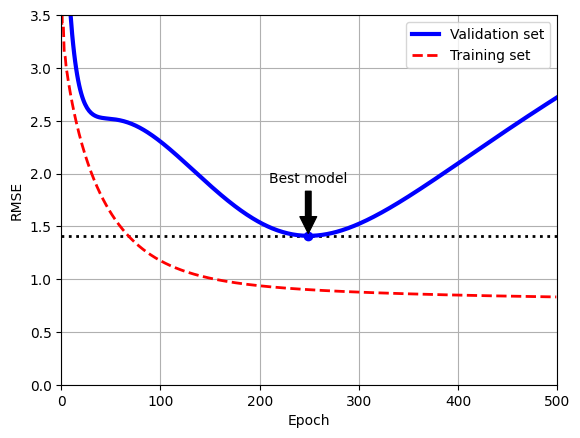

In [52]:
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.plot(best_epoch, best_valid_rmse, "bo")

plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

# Logistic Regression

In [55]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [61]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [64]:
iris.target[:3]

,target
0,0
1,0
2,0


In [65]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

*Spróbujmy stworzyć klasyfikator rozpoznający gatunek Iris virginica jedynie na podstawie szerokości
płatka.*

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

X[:5], y[:5]

(array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2]]),
 array([False, False, False, False, False]))

In [74]:
X.min(), X.max()

(np.float64(0.1), np.float64(2.5))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [75]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)

In [80]:
X_new[:3], y_proba[:3]

(array([[0.        ],
        [0.003003  ],
        [0.00600601]]),
 array([[0.99820801, 0.00179199],
        [0.99818732, 0.00181268],
        [0.99816638, 0.00183362]]))

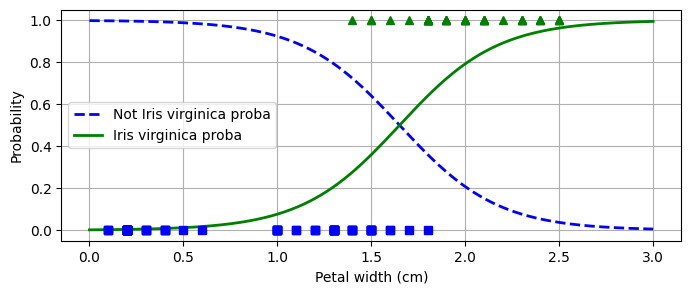

In [84]:
plt.figure(figsize=(8, 3))

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")

plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.grid()

plt.show()

In [90]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

*tym razem korzystamy z dwóch cech: szerokości
i długości płatka.*

In [91]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
# C=2 - Inverse of regularization strength; must be a positive float.
# Like in support vector machines, smaller values specify stronger regularization.
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

In [95]:
X_train[:3], y_train[:3]

(array([[1.4, 0.2],
        [1.5, 0.1],
        [5.1, 1.9]]),
 array([False, False,  True]))

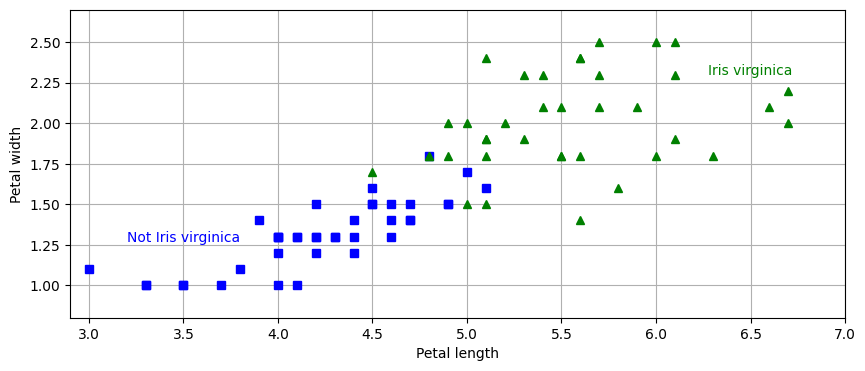

In [96]:
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))

plt.figure(figsize=(10, 4))

plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")

plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()

plt.show()

## Softmax Regression

*Możemy uogólnić model regresji logistycznej do bezpośredniej obsługi wielu klas, bez konieczności
uczenia i łączenia wielu klasyfikatorów binarnych.
Tego typu model nosi nazwę **regresji softmax** lub **wielomianowej/wielorakiej regresji logistycznej (ang. multinomial logistic regression)**.*

*Użyjmy regresji softmax do rozdzielenia roślin kosaćca na trzy klasy. Klasyfikator `LogisticRegression` korzysta automatycznie z regresji softmax podczas trenowania modelu przy użyciu przynajmniej trzech klas (przy założeniu, że używasz domyślnego parametru `solver="lbfgs"`). Domyślnie jest również
wykorzystywana regularyzacja ℓ2, którą regulujemy, przy użyciu hiperparametru C.*

In [98]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [99]:
softmax_reg.predict([[5, 2]])

array([2])

In [100]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

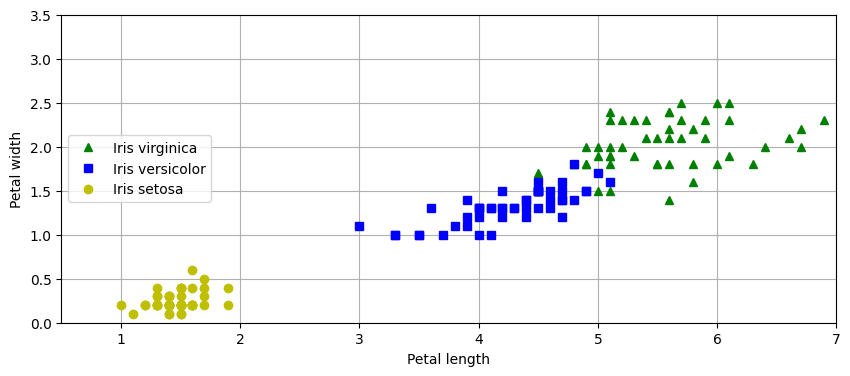

In [101]:
plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()